# Praca Domowa nr 6

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import copy
from sklearn.datasets import fetch_olivetti_faces

## Wczytanie danych

In [2]:
df_1 = fetch_olivetti_faces().data
df_2 = fetch_olivetti_faces().images

print(df_1.shape)

(400, 4096)


## 0 Narysowanie wybranych obrazów

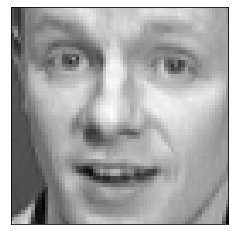

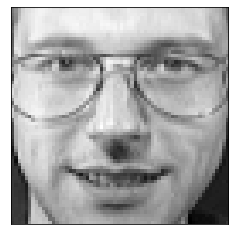

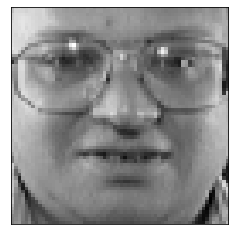

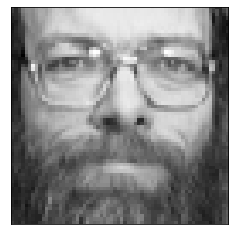

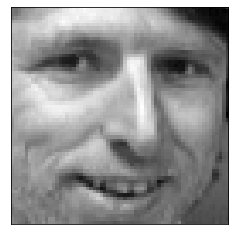

In [3]:
numbers = [207, 260,301,360, 387]
for number in numbers:
    plt.imshow(df_2[number], cmap='gray')
    plt.xticks([],"")
    plt.yticks([],"")
    plt.show()

## 1 PCA

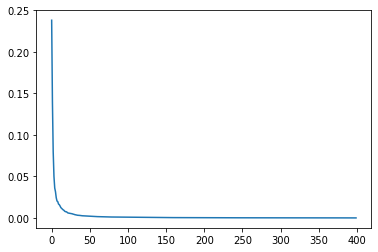

In [4]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(df_1)
plt.plot(pca.explained_variance_ratio_)
plt.show()

Przybliżmy troche wykres

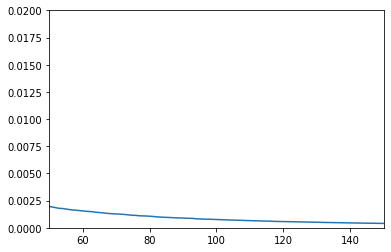

In [5]:
plt.plot(pca.explained_variance_ratio_)
plt.xlim(50,150)
plt.ylim(0,0.02)
plt.show()

Ustalmy liczbe komponentów na 100.

In [6]:
pca=PCA(n_components=100)
pca.fit(df_1)
df_pca=pca.transform(df_1)
print(df_pca.shape)
print(f"CR  {4096/100}")

(400, 100)
CR  40.96


## 2 Transformacja odwrotna

In [7]:
df_inversed_1 = pca.inverse_transform(df_pca)
print(df_inversed_1.shape)
df_inversed_2 = df_inversed_1.reshape(400,64,64)

(400, 4096)


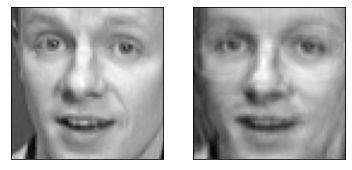

207  RMSE: 0.036643028259277344


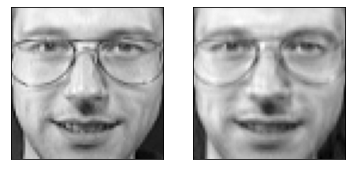

260  RMSE: 0.0406821183860302


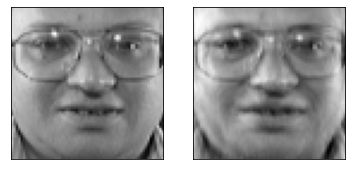

301  RMSE: 0.042404867708683014


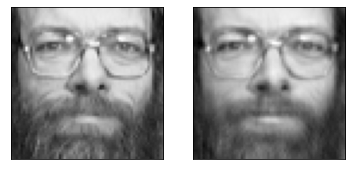

360  RMSE: 0.034100163727998734


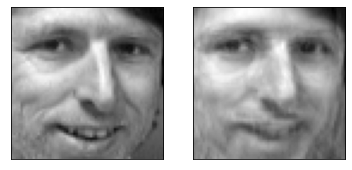

387  RMSE: 0.030036257579922676


In [8]:
for number in numbers:
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(df_2[number],cmap='gray')
    ax[1].imshow(df_inversed_2[number], cmap='gray')
    ax[0].set_xticks([],"")
    ax[0].set_yticks([],"")
    ax[1].set_xticks([],"")
    ax[1].set_yticks([],"")
    plt.show()
    print(f"{number}  RMSE: {np.sqrt(mean_squared_error(df_1[number],df_inversed_1[number]))}")

Obrazki wydają się być do siebie bardzo podobne pomimo dużej redukcji wymiarów z 4096 do 100, a następnie wykonaniu tranformacji odwrotnej. Pokazuje to również mały błąd RMSE.

## 3 Modyfikacje obrazków

In [9]:
transpose = copy.deepcopy(df_2)
for number in numbers:
    transpose[number]=np.transpose(transpose[number])
    
dark = copy.deepcopy(df_2)
for number in numbers:
    for i in range(64):
        for j in range(64):
            dark[number][i][j]= min(df_2[number][i][j] - 0.5, 0)
            
light = copy.deepcopy(df_2)
for number in numbers:
    for i in range(64):
        for j in range(64):
            light[number][i][j]= max(df_2[number][i][j] + 0.5, 1)
            
reversedd = copy.deepcopy(df_2)

for number in numbers:
    for i in range(64):
        for j in range(64):
            reversedd[number][i][j]= df_2[number][63-i][j]


reversedd_2 = copy.deepcopy(df_2)

for number in numbers:
    for i in range(64):
        for j in range(64):
            reversedd_2[number][i][j]= df_2[number][i][63-j]

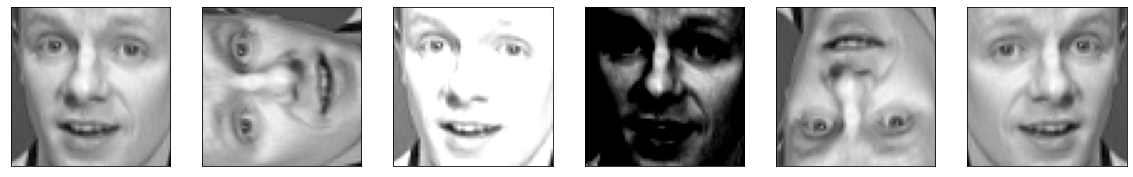

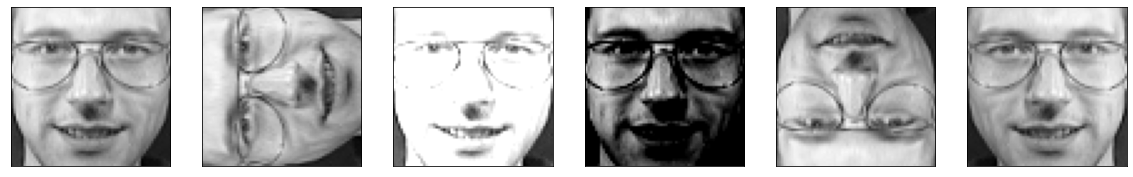

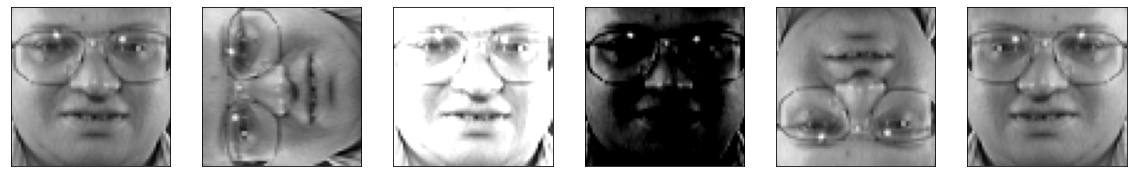

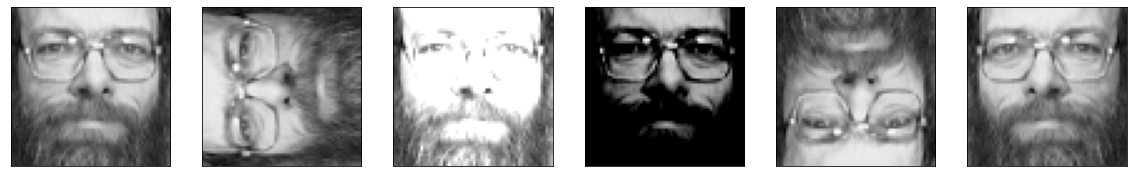

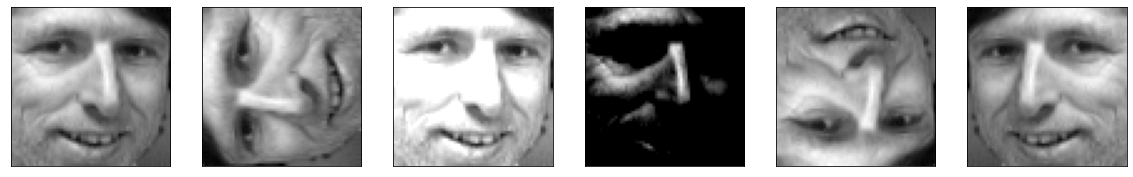

In [10]:
for number in numbers:
    fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20,20))
    ax[0].imshow(df_2[number],cmap='gray')
    ax[1].imshow(transpose[number], cmap='gray')
    ax[2].imshow(dark[number], cmap='gray')
    ax[3].imshow(light[number], cmap='gray')
    ax[4].imshow(reversedd[number], cmap='gray')
    ax[5].imshow(reversedd_2[number], cmap='gray')
    for i in range(6):
        ax[i].set_xticks([],"")
        ax[i].set_yticks([],"")
    plt.show()

## 4 PCA na modyfikacjach

In [11]:
def mod(x):
    df_x = x.reshape(400,4096)
    pca_x = pca.transform(df_x)
    pca_x_1= pca.inverse_transform(pca_x)
    pca_x_2 = pca_x_1.reshape(400,64,64)


    for number in numbers:
        fig, ax = plt.subplots(nrows=1, ncols=2)
        ax[0].imshow(x[number],cmap='gray')
        ax[1].imshow(pca_x_2[number], cmap='gray')
        ax[0].set_xticks([],"")
        ax[0].set_yticks([],"")
        ax[1].set_xticks([],"")
        ax[1].set_yticks([],"")
        plt.show()
        print(f"{number}  RMSE: {np.sqrt(mean_squared_error(df_x[number],pca_x_1[number]))}")
    

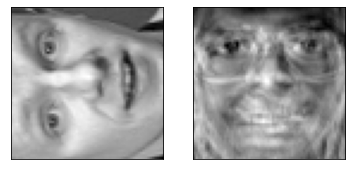

207  RMSE: 0.08542995154857635


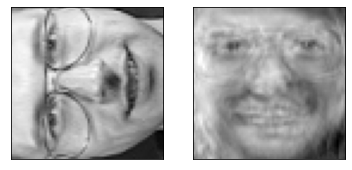

260  RMSE: 0.10379055142402649


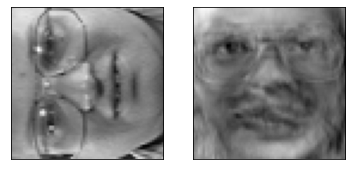

301  RMSE: 0.09348122775554657


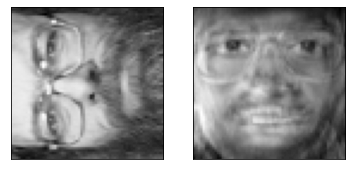

360  RMSE: 0.10139823704957962


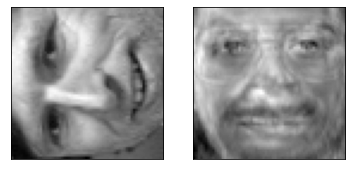

387  RMSE: 0.07792044430971146







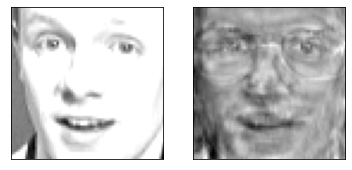

207  RMSE: 0.056570857763290405


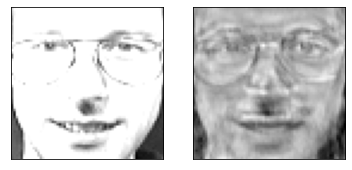

260  RMSE: 0.059536777436733246


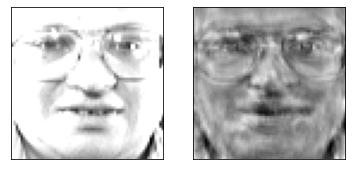

301  RMSE: 0.059957750141620636


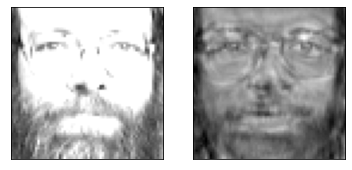

360  RMSE: 0.05919640511274338


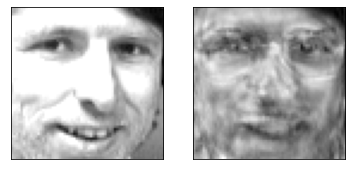

387  RMSE: 0.0546124242246151







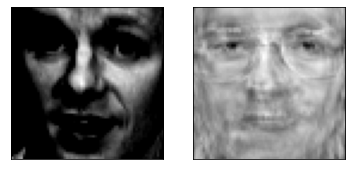

207  RMSE: 0.060261692851781845


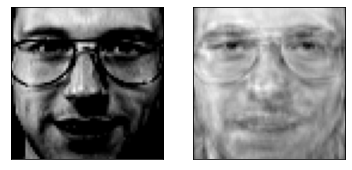

260  RMSE: 0.06491299718618393


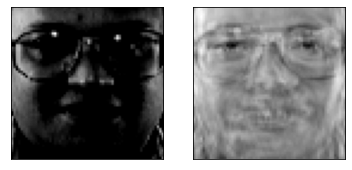

301  RMSE: 0.06555367261171341


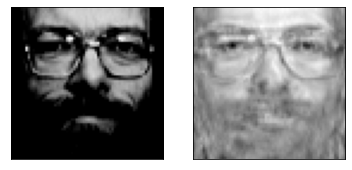

360  RMSE: 0.06192711740732193


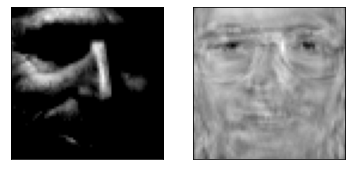

387  RMSE: 0.05811582878232002







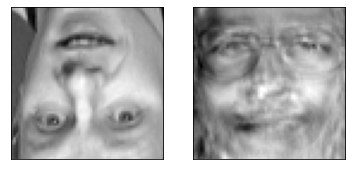

207  RMSE: 0.08158764243125916


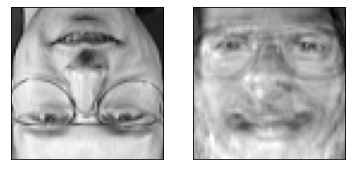

260  RMSE: 0.10657390207052231


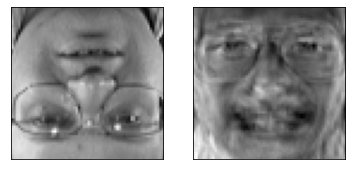

301  RMSE: 0.09431195259094238


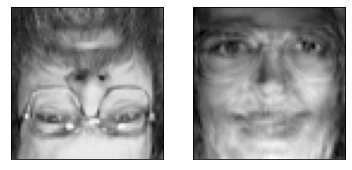

360  RMSE: 0.08522649854421616


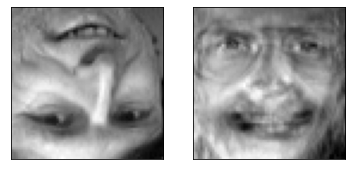

387  RMSE: 0.07326879352331161







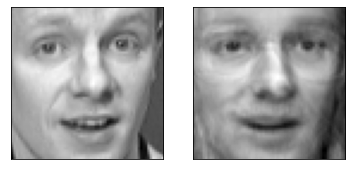

207  RMSE: 0.05086071789264679


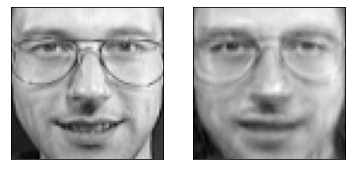

260  RMSE: 0.06708531081676483


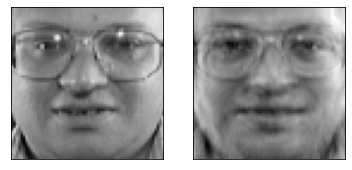

301  RMSE: 0.07090578228235245


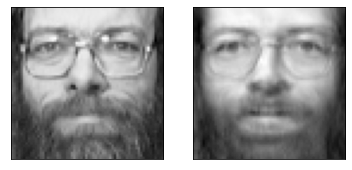

360  RMSE: 0.06261761486530304


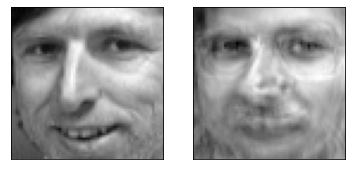

387  RMSE: 0.05567585304379463







In [12]:
tab=[transpose,dark,light,reversedd, reversedd_2]

for i in tab:
    mod(i)
    print("\n\n\n\n")

Przy modifikacjach light oraz dark rmse jest porównywalny do tego z podpunktu 3. Natomiast przy obracaniu obrazków rmse jest już widoczne większe. Ewidetnie model PCA gorzej sobie radzi z tego typu modifikacjami. 

## 5 Anomalie

Z podpunktu nr 4 możemy wnioskować, iż PCA jest wrażliwy na różnego typu obroty obrazów, więc moim zdaniem może slużyć do wykrywania anomali.